In [ ]:
!pip install datasets

In [ ]:
from tqdm.notebook import tqdm
import pandas as pd
from typing import Optional, List, Tuple
from datasets import Dataset
import matplotlib.pyplot as plt

pd.set_option(
    "display.max_colwidth", None
)

In [ ]:
fp = open("tes.txt","r")

s = fp.read().split("\n\n\n")
print(s[0])
print(len(s))

Learner's Licence
File an application online through Transport Department Portal Online Services for Scheduling an appointment for obtaining Learner Licence.  No manual applications are allowed.
Need for a Driving Licence
No person shall drive a motor vehicle in any public place unless he holds an effective driving licence issued to him by the Licensing Authority, authorising him to drive the vehicle.
Licensing Authorities
The Joint Commissioner/ Deputy Commissioner and the Regional Transport Officers are the Licensing Authorities. The Administrative Officers and Motor Vehicle Inspectors are the Additional Licensing Authorities.
Age limit to obtain Driving Licence
An applicant who has completed sixteen years of age is eligible to apply for a driving licence to drive a motor cycle without gear subject to the condition that the parent or guardian should furnish a declaration in the manner prescribed.
The applicant who has completed the age of eighteen years of age is eligible to apply fo

In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.6/315.6 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 18.3 MB/s eta 0:00:00


In [ ]:
import langchain
from langchain.docstore.document import Document as LangchainDocument

RAW_KNOWLEDGE_BASE = [
    # LangchainDocument(page_content=doc["text"], metadata={"source":doc[source]})
    LangchainDocument(page_content=doc)
    for doc in tqdm(s)
]

  0%|          | 0/28 [00:00<?, ?it/s]

In [ ]:
RAW_KNOWLEDGE_BASE[1]

Document(page_content="Permanent Licence\nFile an application online through Transport Department Portal Online Services for Scheduling an appointment for obtaining Permanent Driving Licence.  No manual applications are allowed.\nTransport Department of Telangana provides for online slot- booking to schedule a test of competence at its Driving Tracks. Please visit the website for scheduling an appointment.\nPROCEDURE:\nSchedule an appointment for the test of competence online by visiting the website where such facility exists.\nAn application in Form 4, for a permanent driving licence shall be made along with the Learners' Licence obtained for such class of vehicle.\nThe applicant who has held a valid Learners' Licence, for a period of at least 30 days, shall be competent to appear for the test of competence.\nThe test of competence will be conducted by the competent authority.\nThe applicant should bring a vehicle of the type to which the application relates.\nThe applicant should sat

In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

MARKDOWN_SEPARATORS = [
    "\n#{1,6}",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n---+\n",
    "\n__+\n",
    "\n\n",
    "\n",
    " ",
    ""
]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=100,
    add_start_index=True,
    strip_whitespace=True,
    separators=MARKDOWN_SEPARATORS,
)

docs_processed= []
for doc in RAW_KNOWLEDGE_BASE:
  docs_processed += text_splitter.split_documents([doc])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

  0%|          | 0/83 [00:00<?, ?it/s]

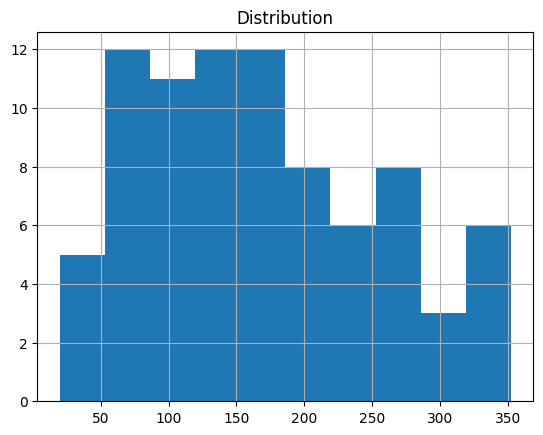

In [ ]:
from sentence_transformers import SentenceTransformer

# print(f"Model's Maximum sequence Length :{SentenceTransformer('thenlper/gte-small').max_seq_length}")

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("thenlper/gte-small")
# tokenizer = AutoTokenizer.from_pretrained("")
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]

fig = pd.Series(lengths).hist()
fig.set_title("Histogram of Document Lengths")
plt.title("Distribution")
plt.show()

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer

EMBEDDING_MODEL_NAME = "thenlper/gte-small"

def split_documents(
        chunk_size: int,
        knowledge_base: list[LangchainDocument],
        tokenizer_name : Optional[str] = EMBEDDING_MODEL_NAME,
) -> List[LangchainDocument]:
    """
    Split documents into chunks of maximum size 'chunk_size' tokens and return a list of documents.
    """
    text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
        AutoTokenizer.from_pretrained(tokenizer_name),
        chunk_size=chunk_size,
        chunk_overlap=int(chunk_size/10),
        add_start_index=True,
        strip_whitespace=True,
        separators=MARKDOWN_SEPARATORS,
    )
    docs_processed = []
    for doc in knowledge_base:
        docs_processed += text_splitter.split_documents([doc])

    #remove duplicates
    unique_texts = {}
    docs_processed_unique = []
    for doc in docs_processed:
        if doc.page_content not in unique_texts:
            unique_texts[doc.page_content] = True
            docs_processed_unique.append(doc)
    return docs_processed_unique

docs_processed = split_documents(
    512,
    RAW_KNOWLEDGE_BASE,
    tokenizer_name=EMBEDDING_MODEL_NAME,
)

In [ ]:
print(len(docs_processed))
docs_processed[0:3]

48


[Document(page_content="Learner's Licence\nFile an application online through Transport Department Portal Online Services for Scheduling an appointment for obtaining Learner Licence.  No manual applications are allowed.\nNeed for a Driving Licence\nNo person shall drive a motor vehicle in any public place unless he holds an effective driving licence issued to him by the Licensing Authority, authorising him to drive the vehicle.\nLicensing Authorities\nThe Joint Commissioner/ Deputy Commissioner and the Regional Transport Officers are the Licensing Authorities. The Administrative Officers and Motor Vehicle Inspectors are the Additional Licensing Authorities.\nAge limit to obtain Driving Licence\nAn applicant who has completed sixteen years of age is eligible to apply for a driving licence to drive a motor cycle without gear subject to the condition that the parent or guardian should furnish a declaration in the manner prescribed.\nThe applicant who has completed the age of eighteen year

In [ ]:
!pip install faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 9.2 MB/s eta 0:00:00


In [ ]:
!pip install -U langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.3 MB/s eta 0:00:00


In [ ]:
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy

embedding_model = HuggingFaceEmbeddings(
    model_name=EMBEDDING_MODEL_NAME,
    multi_process = True,
    model_kwargs = {"device":"cuda"},
    encode_kwargs = {"normalize_embeddings":True},
)

KNOWLEDGE_VECTOR_DATABASE = FAISS.from_documents(
    docs_processed,
    embedding_model,
    distance_strategy=DistanceStrategy.COSINE,
)


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
!pip install accelerate

In [ ]:
pip install accelerate

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

torch.random.manual_seed(0)

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-128k-instruct",
    #device_map="auto",
    torch_dtype="auto",
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-128k-instruct")

# messages = [
#     {"role": "user", "content": "Can you provide ways to eat combinations of bananas and dragonfruits?"},
#     {"role": "assistant", "content": "Sure! Here are some ways to eat bananas and dragonfruits together: 1. Banana and dragonfruit smoothie: Blend bananas and dragonfruits together with some milk and honey. 2. Banana and dragonfruit salad: Mix sliced bananas and dragonfruits together with some lemon juice and honey."},
#     {"role": "user", "content": "What about solving an 2x + 3 = 7 equation?"},
# ]

pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)

generation_args = {
    "max_new_tokens": 500,
    "return_full_text": False,
    "temperature": 0.0,
    "do_sample": False,
}

# output = pipe(messages, **generation_args)
# print(output[0]['generated_text'])

In [ ]:
prompt_chat=[
    {
        "role":"system",
        "content":"""Using the information contained in the context,
Give a comprehensive answer to the question.
Respond only to the question asked , response should be concise and relevant to the question.
provide the number of the source document when relevant.
If the answer cannot be deduced from the context, do not give an answer""",

    },
    {
        "role":"user",
        "content":"""Context:
{context}
---
Now here is the Question you need to answer.
Question:{question}
        """,
    },
]
RAG_PROMPT_TEMPLATE = tokenizer.apply_chat_template(
    prompt_chat,tokenize = False,add_generation_prompt=True,

)
print(RAG_PROMPT_TEMPLATE)

In [ ]:
def is_relevant_context(context, question, min_relevance_threshold=0.5):
    # Placeholder function to check relevance
    # You can implement a more sophisticated relevance check
    return len(context) > 0  # Simple check: ensure context is non-empty

# Function to generate an answer based on the query
def generate_answer(question):
    retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=question, k=3)
    context = " ".join([doc.page_content for doc in retrieved_docs])

    if is_relevant_context(context, question):
        final_prompt = RAG_PROMPT_TEMPLATE.format(question=question, context=context)
        output = pipe(final_prompt, **generation_args)
        return output[0]['generated_text']
    else:
        return "The answer cannot be deduced from the provided context."

In [ ]:
keywords={"vehicle", "tax", "transaction", "online", "payment", "amount", "bank", "helpdesk", "mobile", "number", "service", "state", "RTO", "forms", "duration", "type", "renewal", "weight", "cost", "exemption", "environment", "green", "cess", "safety", "municipality", "receipt", "refund", "record", "ownership", "NOC", "permit", "status", "appointment", "insurance", "duplicate", "certificate", "termination", "addition", "details", "change", "information", "upload", "documents", "learner", "license", "test", "driving", "apply", "medical", "registration", "category", "MCWOG", "MCWG", "MC50CC", "age", "criteria", "expiry", "application", "processing", "surrender", "process", "transfer", "check", "reprint", "fitness", "disposal", "hypothecation", "update", "edit", "delete", "view", "summary", "scrutiny", "email", "session", "expired", "citizen", "camp", "questions", "exam", "home", "report", "error", "eligibility", "mock", "steps", "sheet", "validity", "procedure", "valid", "India", "print", "message", "center", "acknowledgement", "fee", "download", "re-appointment", "absent", "failed", "schedule", "obtain", "permanent", "new", "driver", "system", "generated", "found", "motor", "lost", "different", "search", "pre-filled", "form", "issued", "issue", "date", "endorsement", "dispatch", "delivered", "tracking", "data", "Digilocker", "enabled", "manual", "entry", "public", "badge", "national", "register", "authenticate", "use", "foreign", "backlog", "modify", "particulars", "retest", "suspicious", "submit", "payments", "fees", "deducted", "pending"}


In [ ]:
def check_keywords_in_query(query, keywords):
    query_words = set(query.lower().split())
    if query_words.intersection(keywords):
        return True
    return False

u_query = "who is the father of the nation"
if check_keywords_in_query(u_query, keywords):
    retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query, k=6)
    context = retrieved_docs[0].page_content
    final_prompt = RAG_PROMPT_TEMPLATE.format(question=u_query, context=context)

    output = pipe(final_prompt, **generation_args)
    print("YOUR QUESTION:\n", u_query, "\n")
    print("MICROSOFT 128K ANSWER: \n", output[0]['generated_text'])
else:
    print("Not related")

In [ ]:
output = pipe(final_prompt, **generation_args)
print(output[0]['generated_text'])

In [ ]:
output = pipe(final_prompt, **generation_args)
print(output[0]['generated_text'])

In [ ]:
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)
print("======================================\n")
for i in retrieved_docs:
    print(i)
    print()
print("======================================\n")